In [287]:
print('5조')
print('주제 : 한국 주식시장에 영향을 미치는 요소들을 파악 후 매매 시기 추천')
print('팀원 : 김연후, 우사랑')

5조
주제 : 한국 주식시장에 영향을 미치는 요소들을 파악 후 매매 시기 추천
팀원 : 김연후, 우사랑


In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
import seaborn as sns

In [289]:
with open('USD_KRW.csv', 'r', encoding='euc-kr') as usd : 
    contents = usd.read()

In [290]:
usd = pd.read_csv('USD_KRW.csv', encoding='euc-kr')
usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1565 non-null   object 
 1   종가      1565 non-null   float64
 2   시가      1565 non-null   float64
 3   고가      1565 non-null   float64
 4   저가      1565 non-null   float64
 5   거래량     788 non-null    object 
 6   변동 %    1565 non-null   float64
dtypes: float64(5), object(2)
memory usage: 85.7+ KB


In [291]:
usd = pd.read_csv('USD_KRW.csv', encoding='euc-kr')
cny = pd.read_csv('CNY_KRW.csv', encoding='euc-kr')
kpi = pd.read_csv('KOSPI.csv', encoding='euc-kr')
kdak = pd.read_csv('KOSDAK.csv', encoding='euc-kr')
gold =pd.read_csv('GOLD.csv', encoding='euc-kr')
sp = pd.read_csv('S&P_500.csv', encoding='euc-kr')

In [292]:
cny
type(cny)

pandas.core.frame.DataFrame

In [293]:
usd
type(usd)

pandas.core.frame.DataFrame

In [294]:
kpi
type(kpi)

pandas.core.frame.DataFrame

In [295]:
gold
type(gold)

pandas.core.frame.DataFrame

In [296]:
sp
type(gold)

pandas.core.frame.DataFrame

In [297]:
kdak
type(kdak)

pandas.core.frame.DataFrame

In [298]:
#cny.head()
#cny.tail()
cny.info()
#cny.describe().T
#중국과 한국의 환율 데이터 확인을 위해 head/tail/info/decribe를 사용하였습니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1565 non-null   object 
 1   종가      1565 non-null   float64
 2   시가      1565 non-null   float64
 3   고가      1565 non-null   float64
 4   저가      1565 non-null   float64
 5   거래량     0 non-null      float64
 6   변동 %    1565 non-null   float64
dtypes: float64(6), object(1)
memory usage: 85.7+ KB


In [305]:
cny = cny.astype(['변동 %':'float'])
cny

SyntaxError: invalid syntax (2260704075.py, line 1)

In [306]:
#usd.head()
#usd.tail()
usd.info()
#usd.describe().T
#미국과 한국의 환율 데이터 확인을 위해 head/tail/info/decribe를 사용하였습니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1565 non-null   object 
 1   종가      1565 non-null   float64
 2   시가      1565 non-null   float64
 3   고가      1565 non-null   float64
 4   저가      1565 non-null   float64
 5   거래량     788 non-null    object 
 6   변동 %    1565 non-null   float64
dtypes: float64(5), object(2)
memory usage: 85.7+ KB


In [307]:
#kdak.head()
#kdak.tail()
kdak.info()
#kdak.describe().T
#코스닥 데이터 확인을 위해 head/tail/info/decribe를 사용하였습니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1475 non-null   object 
 1   종가      1475 non-null   float64
 2   시가      1475 non-null   float64
 3   고가      1475 non-null   float64
 4   저가      1475 non-null   float64
 5   거래량     1475 non-null   object 
 6   변동 %    1475 non-null   float64
dtypes: float64(5), object(2)
memory usage: 80.8+ KB


In [308]:
#kpi.head()
#kpi.tail()
kpi.info()
#kpi.describe().T
#코스피 데이터 확인을 위해 head/tail/info/decribe를 사용하였습니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1475 non-null   object 
 1   종가      1475 non-null   float64
 2   시가      1475 non-null   float64
 3   고가      1475 non-null   float64
 4   저가      1475 non-null   float64
 5   거래량     1475 non-null   object 
 6   변동 %    1475 non-null   float64
dtypes: float64(5), object(2)
memory usage: 80.8+ KB


In [309]:
#gold.head()
#gold.tail()
gold.info()
#gold.describe().T
#금 시세 데이터 확인을 위해 head/tail/info/decribe를 사용하였습니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1550 non-null   object 
 1   종가      1550 non-null   float64
 2   시가      1550 non-null   float64
 3   고가      1550 non-null   float64
 4   저가      1550 non-null   float64
 5   거래량     1548 non-null   object 
 6   변동 %    1550 non-null   float64
dtypes: float64(5), object(2)
memory usage: 84.9+ KB


In [310]:
#sp.head()
#sp.tail()
sp.info()
#sp.describe().T
#S&P_500 데이터 확인을 위해 head/tail/info/decribe를 사용하였습니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1510 non-null   object 
 1   종가      1510 non-null   float64
 2   시가      1510 non-null   float64
 3   고가      1510 non-null   float64
 4   저가      1510 non-null   float64
 5   거래량     0 non-null      float64
 6   변동 %    1510 non-null   float64
dtypes: float64(6), object(1)
memory usage: 82.7+ KB


In [311]:
kdak_columns = kdak.columns
pd.Series(kdak_columns)

0      날짜
1      종가
2      시가
3      고가
4      저가
5     거래량
6    변동 %
dtype: object

In [312]:
cny_columns = cny.columns
pd.Series(cny_columns)

0      날짜
1      종가
2      시가
3      고가
4      저가
5     거래량
6    변동 %
dtype: object

In [313]:
usd_columns = usd.columns
pd.Series(usd_columns)

0      날짜
1      종가
2      시가
3      고가
4      저가
5     거래량
6    변동 %
dtype: object

In [314]:
kpi_columns = kpi.columns
pd.Series(kpi_columns)

0      날짜
1      종가
2      시가
3      고가
4      저가
5     거래량
6    변동 %
dtype: object

In [315]:
gold_columns = gold.columns
pd.Series(gold_columns)

0      날짜
1      종가
2      시가
3      고가
4      저가
5     거래량
6    변동 %
dtype: object

In [316]:
sp_columns = sp.columns
pd.Series(sp_columns)

0      날짜
1      종가
2      시가
3      고가
4      저가
5     거래량
6    변동 %
dtype: object

In [317]:
#index의 값이 한국어로 표기되어 있어 더욱 편리하게 하기 위해
#영어로 변경하였습니다.
col_map = {'날짜' : 'date',
           '종가' : 'close',
           '시가' : 'open',
           '고가' : 'high',
           '저가' : 'low',
           '거래량' : 'volume',
           '변동 %' : 'fluctuations'}

kdak.rename(columns=col_map)

date   close    open    high     low   volume  fluctuations
0     2017-01-02  632.04  632.89  633.00  629.54  512.16K        0.0010
1     2017-01-03  636.57  633.30  636.65  633.10  622.54K        0.0072
2     2017-01-04  639.79  638.73  639.91  636.74  617.47K        0.0051
3     2017-01-05  642.48  642.01  642.64  640.87  811.28K        0.0042
4     2017-01-06  643.68  643.96  644.17  641.96  758.43K        0.0019
...          ...     ...     ...     ...     ...      ...           ...
1470  2022-12-23  691.25  704.93  704.93  691.25    1.11B       -0.0332
1471  2022-12-26  694.68  691.94  696.96  686.80  797.71M        0.0050
1472  2022-12-27  704.19  697.25  704.21  697.25  901.44M        0.0137
1473  2022-12-28  692.37  699.24  699.39  691.01  834.83M       -0.0168
1474  2022-12-29  679.29  691.35  693.12  675.80  952.16M       -0.0189

[1475 rows x 7 columns]

In [318]:
kdak.rename(columns=col_map, inplace=True)
kdak

date   close    open    high     low   volume  fluctuations
0     2017-01-02  632.04  632.89  633.00  629.54  512.16K        0.0010
1     2017-01-03  636.57  633.30  636.65  633.10  622.54K        0.0072
2     2017-01-04  639.79  638.73  639.91  636.74  617.47K        0.0051
3     2017-01-05  642.48  642.01  642.64  640.87  811.28K        0.0042
4     2017-01-06  643.68  643.96  644.17  641.96  758.43K        0.0019
...          ...     ...     ...     ...     ...      ...           ...
1470  2022-12-23  691.25  704.93  704.93  691.25    1.11B       -0.0332
1471  2022-12-26  694.68  691.94  696.96  686.80  797.71M        0.0050
1472  2022-12-27  704.19  697.25  704.21  697.25  901.44M        0.0137
1473  2022-12-28  692.37  699.24  699.39  691.01  834.83M       -0.0168
1474  2022-12-29  679.29  691.35  693.12  675.80  952.16M       -0.0189

[1475 rows x 7 columns]

In [319]:
#cny.rename(columns=col_map)
cny.rename(columns=col_map, inplace=True)
cny

date   close    open    high     low  volume  fluctuations
0     2022-12-30  182.74  181.12  182.99  180.81     NaN        0.0094
1     2022-12-29  181.03  182.65  182.74  180.82     NaN       -0.0084
2     2022-12-28  182.57  182.79  182.99  181.54     NaN       -0.0008
3     2022-12-27  182.72  183.12  183.22  181.68     NaN       -0.0012
4     2022-12-26  182.94  183.10  183.49  182.35     NaN       -0.0004
...          ...     ...     ...     ...     ...     ...           ...
1560  2017-01-06  173.68  171.54  173.73  171.29     NaN        0.0122
1561  2017-01-05  171.58  172.54  173.11  171.43     NaN       -0.0052
1562  2017-01-04  172.48  173.36  174.06  172.30     NaN       -0.0051
1563  2017-01-03  173.37  173.39  174.67  172.83     NaN        0.0001
1564  2017-01-02  173.36  173.78  174.32  173.25     NaN       -0.0027

[1565 rows x 7 columns]

In [320]:
usd.rename(columns=col_map, inplace=True)
usd

date    close     open     high      low volume  fluctuations
0     2022-12-30  1260.92  1261.24  1265.34  1253.26    NaN        0.0001
1     2022-12-29  1260.85  1274.71  1275.32  1259.19    NaN       -0.0106
2     2022-12-28  1274.37  1272.25  1276.66  1265.57    NaN        0.0020
3     2022-12-27  1271.79  1274.91  1275.63  1264.85    NaN       -0.0017
4     2022-12-26  1273.91  1279.80  1282.20  1273.89    NaN       -0.0044
...          ...      ...      ...      ...      ...    ...           ...
1560  2017-01-06  1202.00  1181.79  1202.33  1180.19    NaN        0.0168
1561  2017-01-05  1182.19  1196.56  1196.72  1181.17    NaN       -0.0117
1562  2017-01-04  1196.15  1206.82  1210.11  1194.89    NaN       -0.0088
1563  2017-01-03  1206.82  1203.93  1212.81  1201.39    NaN        0.0024
1564  2017-01-02  1203.93  1206.85  1210.70  1203.19    NaN       -0.0028

[1565 rows x 7 columns]

In [321]:
kpi.rename(columns=col_map, inplace=True)
kpi

date    close     open     high      low   volume  fluctuations
0     2017-01-02  2026.16  2022.23  2031.79  2015.68  229.88M       -0.0001
1     2017-01-03  2043.97  2034.31  2044.07  2028.47  268.13M        0.0088
2     2017-01-04  2045.64  2046.29  2046.29  2040.61  371.49M        0.0008
3     2017-01-05  2041.95  2045.52  2046.50  2039.49  541.34M       -0.0018
4     2017-01-06  2049.12  2048.11  2051.84  2045.66  455.35M        0.0035
...          ...      ...      ...      ...      ...      ...           ...
1470  2022-12-23  2313.69  2325.86  2333.08  2311.90  366.99M       -0.0183
1471  2022-12-26  2317.14  2312.54  2321.92  2304.20  427.84M        0.0015
1472  2022-12-27  2332.79  2327.52  2335.99  2321.48  448.50M        0.0068
1473  2022-12-28  2280.45  2296.45  2296.45  2276.90  405.89M       -0.0224
1474  2022-12-29  2236.40  2265.73  2272.67  2236.38  361.19M       -0.0193

[1475 rows x 7 columns]

In [322]:
gold.rename(columns=col_map, inplace=True)
gold

date   close    open     high      low   volume  fluctuations
0     2017-01-03  1162.0  1151.4  1166.00  1146.50  229.18K        0.0089
1     2017-01-04  1165.3  1159.6  1168.60  1156.70  179.88K        0.0028
2     2017-01-05  1181.3  1164.6  1185.90  1163.60  272.12K        0.0137
3     2017-01-06  1173.4  1181.0  1183.80  1171.10  226.43K       -0.0067
4     2017-01-09  1184.9  1172.9  1186.40  1172.20  179.03K        0.0098
...          ...     ...     ...      ...      ...      ...           ...
1545  2022-12-26  1809.7  1805.8  1811.95  1805.55      NaN        0.0030
1546  2022-12-27  1823.1  1808.2  1841.90  1808.00  159.62K        0.0074
1547  2022-12-28  1815.8  1822.4  1822.80  1804.20  118.08K       -0.0040
1548  2022-12-29  1826.0  1812.3  1827.30  1811.20  105.99K        0.0056
1549  2022-12-30  1826.2  1821.8  1832.40  1819.80  107.50K        0.0001

[1550 rows x 7 columns]

In [323]:
sp.rename(columns=col_map, inplace=True)
sp

date    close     open     high      low  volume  fluctuations
0     2017-01-03  2257.83  2251.57  2263.88  2245.13     NaN        0.0085
1     2017-01-04  2270.75  2261.60  2272.82  2261.60     NaN        0.0057
2     2017-01-05  2269.00  2268.18  2271.50  2260.45     NaN       -0.0008
3     2017-01-06  2276.98  2271.14  2282.10  2264.06     NaN        0.0035
4     2017-01-09  2268.90  2273.59  2275.49  2268.90     NaN       -0.0035
...          ...      ...      ...      ...      ...     ...           ...
1505  2022-12-23  3844.82  3815.11  3845.80  3797.01     NaN        0.0059
1506  2022-12-27  3829.25  3843.34  3846.65  3813.22     NaN       -0.0040
1507  2022-12-28  3783.22  3829.56  3848.32  3780.78     NaN       -0.0120
1508  2022-12-29  3849.28  3805.45  3858.19  3805.45     NaN        0.0175
1509  2022-12-30  3839.50  3829.06  3839.85  3800.34     NaN       -0.0025

[1510 rows x 7 columns]

In [324]:
kdak_index = kdak.index
kdak_index

RangeIndex(start=0, stop=1475, step=1)

In [325]:
cny_index = cny.index
cny_index

RangeIndex(start=0, stop=1565, step=1)

In [326]:
usd_index = usd.index
usd_index

RangeIndex(start=0, stop=1565, step=1)

In [327]:
kpi_index = kpi.index
kpi_index

RangeIndex(start=0, stop=1475, step=1)

In [328]:
gold_index = gold.index
gold_index

RangeIndex(start=0, stop=1550, step=1)

In [329]:
sp_index = sp.index
sp_index

RangeIndex(start=0, stop=1510, step=1)

In [330]:
#코스닥과 코스피의 경우 1475개, S&P_500의 경우 1510개로
#양이 다른 것을 알 수 있고, 그 이유는 한국 증시와 미국 증시의
#공휴일과 같은 날로 인해 운영하지 않은 날이 존재하기때문입니다.

In [331]:
kdak.isna().sum()

date            0
close           0
open            0
high            0
low             0
volume          0
fluctuations    0
dtype: int64

In [332]:
cny.isna().sum()

date               0
close              0
open               0
high               0
low                0
volume          1565
fluctuations       0
dtype: int64

In [333]:
usd.isna().sum()

date              0
close             0
open              0
high              0
low               0
volume          777
fluctuations      0
dtype: int64

In [334]:
kpi.isna().sum()

date            0
close           0
open            0
high            0
low             0
volume          0
fluctuations    0
dtype: int64

In [335]:
gold.isna().sum()

date            0
close           0
open            0
high            0
low             0
volume          2
fluctuations    0
dtype: int64

In [336]:
sp.isna().sum()

date               0
close              0
open               0
high               0
low                0
volume          1510
fluctuations       0
dtype: int64

In [337]:
#N/A를 대체할 값 입력하지 않고 삭제하겠습니다.

In [360]:
cny = cny.drop('volume',axis=1)
#usd = usd.drop('volume',axis=1)
#kpi = kpi.drop('volume',axis=1)
#kdak = kdak.drop('volume', axis=1)
#sp = sp.drop('volume',axis=1)
#gold = gold.drop('volume', axis=1)
#결측치 및 volume열 삭제

KeyError: "['volume'] not found in axis"

In [361]:
#cny
#usd
#kpi
#kdak
#sp
gold

date   close    open     high      low  fluctuations
0     2017-01-03  1162.0  1151.4  1166.00  1146.50        0.0089
1     2017-01-04  1165.3  1159.6  1168.60  1156.70        0.0028
2     2017-01-05  1181.3  1164.6  1185.90  1163.60        0.0137
3     2017-01-06  1173.4  1181.0  1183.80  1171.10       -0.0067
4     2017-01-09  1184.9  1172.9  1186.40  1172.20        0.0098
...          ...     ...     ...      ...      ...           ...
1545  2022-12-26  1809.7  1805.8  1811.95  1805.55        0.0030
1546  2022-12-27  1823.1  1808.2  1841.90  1808.00        0.0074
1547  2022-12-28  1815.8  1822.4  1822.80  1804.20       -0.0040
1548  2022-12-29  1826.0  1812.3  1827.30  1811.20        0.0056
1549  2022-12-30  1826.2  1821.8  1832.40  1819.80        0.0001

[1550 rows x 6 columns]

In [362]:
#kdak.isnull().sum().sum()
#usd.isnull().sum().sum()
#cny.isnull().sum().sum()
#kpi.isnull().sum().sum()
#gold.isnull().sum().sum()
sp.isnull().sum().sum()
#N/A 값이 존재하지 않는 것을 알 수 있습니다.

0

In [363]:
kdak.shape

(1475, 6)

In [364]:
cny.shape
#중국 환율과 한국 증시를 비교해본 결과 90개의 열 개수가
#차이나는 것을 확인하였습니다. 
#group mean을 활용하여 갯수를 맞출 예정입니다.

(1565, 6)

In [365]:
cny.date.describe(include=['object']).T

count           1565
unique          1565
top       2022-12-30
freq               1
Name: date, dtype: object

In [366]:
kdak.date.describe(include=['object'])

count           1475
unique          1475
top       2017-01-02
freq               1
Name: date, dtype: object

In [367]:
cny.select_dtypes(include=['float64']).nunique()

close           1127
open            1145
high            1123
low             1094
fluctuations     236
dtype: int64

In [368]:
kdak.select_dtypes(include=['object']).nunique()

date    1475
dtype: int64

In [369]:
cny.dtypes

date             object
close           float64
open            float64
high            float64
low             float64
fluctuations    float64
dtype: object

In [370]:
kdak.dtypes

date             object
close           float64
open            float64
high            float64
low             float64
fluctuations    float64
dtype: object

In [371]:
kdak1 = kdak[['date','close','open','fluctuations']]
kdak1

date   close    open  fluctuations
0     2017-01-02  632.04  632.89        0.0010
1     2017-01-03  636.57  633.30        0.0072
2     2017-01-04  639.79  638.73        0.0051
3     2017-01-05  642.48  642.01        0.0042
4     2017-01-06  643.68  643.96        0.0019
...          ...     ...     ...           ...
1470  2022-12-23  691.25  704.93       -0.0332
1471  2022-12-26  694.68  691.94        0.0050
1472  2022-12-27  704.19  697.25        0.0137
1473  2022-12-28  692.37  699.24       -0.0168
1474  2022-12-29  679.29  691.35       -0.0189

[1475 rows x 4 columns]

In [372]:
cny1 = cny[['date','close','open','fluctuations']]
cny1

date   close    open  fluctuations
0     2022-12-30  182.74  181.12        0.0094
1     2022-12-29  181.03  182.65       -0.0084
2     2022-12-28  182.57  182.79       -0.0008
3     2022-12-27  182.72  183.12       -0.0012
4     2022-12-26  182.94  183.10       -0.0004
...          ...     ...     ...           ...
1560  2017-01-06  173.68  171.54        0.0122
1561  2017-01-05  171.58  172.54       -0.0052
1562  2017-01-04  172.48  173.36       -0.0051
1563  2017-01-03  173.37  173.39        0.0001
1564  2017-01-02  173.36  173.78       -0.0027

[1565 rows x 4 columns]

In [373]:
(
    kdak[['date','close','open','fluctuations']]
    .sort_values('fluctuations',ascending=False)
)

date   close    open  fluctuations
787  2020-03-20  467.75  443.88        0.0920
789  2020-03-24  480.40  457.21        0.0826
845  2020-06-16  735.38  716.60        0.0609
790  2020-03-25  505.68  496.32        0.0526
447  2018-11-02  690.65  666.59        0.0505
..          ...     ...     ...           ...
785  2020-03-18  485.14  520.79       -0.0575
782  2020-03-13  524.00  536.62       -0.0701
844  2020-06-15  693.15  745.60       -0.0709
633  2019-08-05  569.79  614.69       -0.0746
786  2020-03-19  428.35  501.59       -0.1171

[1475 rows x 4 columns]

In [374]:
(
    cny[['date','close','open','fluctuations']]
    .sort_values('fluctuations', ascending=False)
)
#['date','closing_price','opening_price','fluctuations']중 fluctuations열을 기준으로 내림차순 정렬

date   close    open  fluctuations
729   2020-03-16  176.29  172.87        0.0197
1280  2018-02-02  172.97  170.05        0.0175
1552  2017-01-18  172.30  169.36        0.0174
78    2022-09-13  201.35  198.55        0.0149
724   2020-03-23  179.49  176.94        0.0149
...          ...     ...     ...           ...
35    2022-11-11  184.77  187.86       -0.0158
1543  2017-01-31  167.35  170.12       -0.0163
759   2020-02-03  169.59  172.42       -0.0164
1512  2017-03-15  163.22  166.29       -0.0185
723   2020-03-24  174.74  179.55       -0.0265

[1565 rows x 4 columns]

In [375]:
(
    cny[['date','close','open','fluctuations']]
    .sort_values('fluctuations', ascending=False)
    .head(10)
)
#fluctuations열 내림차순 중 중복값은 제거

date   close    open  fluctuations
729   2020-03-16  176.29  172.87        0.0197
1280  2018-02-02  172.97  170.05        0.0175
1552  2017-01-18  172.30  169.36        0.0174
78    2022-09-13  201.35  198.55        0.0149
724   2020-03-23  179.49  176.94        0.0149
1389  2017-09-04  173.54  171.02        0.0148
402   2021-06-16  177.05  174.52        0.0147
11    2022-12-15  189.01  186.44        0.0143
19    2022-12-05  187.48  185.08        0.0141
66    2022-09-29  200.55  197.79        0.0140

In [376]:
(
    kdak[['date','close','open','fluctuations']]
    .sort_values('fluctuations', ascending=False)
    .drop_duplicates(subset='fluctuations')
    .head(10)
)
#fluctuations열 내림차순 중 중복값은 제거

date   close    open  fluctuations
787   2020-03-20  467.75  443.88        0.0920
789   2020-03-24  480.40  457.21        0.0826
845   2020-06-16  735.38  716.60        0.0609
790   2020-03-25  505.68  496.32        0.0526
447   2018-11-02  690.65  666.59        0.0505
1345  2022-06-24  750.30  719.47        0.0503
794   2020-03-31  569.07  551.48        0.0497
1258  2022-02-16  878.15  857.54        0.0455
798   2020-04-06  597.21  579.25        0.0422
1420  2022-10-14  678.24  665.17        0.0409

In [377]:
cny.dtypes.value_counts()

float64    5
object     1
dtype: int64

In [378]:
kdak.dtypes.value_counts()

float64    5
object     1
dtype: int64

In [379]:
cny.nunique()

date            1565
close           1127
open            1145
high            1123
low             1094
fluctuations     236
dtype: int64

In [380]:
kdak.nunique()

date            1475
close           1444
open            1456
high            1455
low             1457
fluctuations     513
dtype: int64

In [381]:
cny.date

0       2022-12-30
1       2022-12-29
2       2022-12-28
3       2022-12-27
4       2022-12-26
           ...    
1560    2017-01-06
1561    2017-01-05
1562    2017-01-04
1563    2017-01-03
1564    2017-01-02
Name: date, Length: 1565, dtype: object

In [382]:
date = cny['date']
new_date = [datetime.strptime(d.strip(),'%Y-%m-%d')for d in date]
new_date

[datetime.datetime(2022, 12, 30, 0, 0),
 datetime.datetime(2022, 12, 29, 0, 0),
 datetime.datetime(2022, 12, 28, 0, 0),
 datetime.datetime(2022, 12, 27, 0, 0),
 datetime.datetime(2022, 12, 26, 0, 0),
 datetime.datetime(2022, 12, 23, 0, 0),
 datetime.datetime(2022, 12, 22, 0, 0),
 datetime.datetime(2022, 12, 21, 0, 0),
 datetime.datetime(2022, 12, 20, 0, 0),
 datetime.datetime(2022, 12, 19, 0, 0),
 datetime.datetime(2022, 12, 16, 0, 0),
 datetime.datetime(2022, 12, 15, 0, 0),
 datetime.datetime(2022, 12, 14, 0, 0),
 datetime.datetime(2022, 12, 13, 0, 0),
 datetime.datetime(2022, 12, 12, 0, 0),
 datetime.datetime(2022, 12, 9, 0, 0),
 datetime.datetime(2022, 12, 8, 0, 0),
 datetime.datetime(2022, 12, 7, 0, 0),
 datetime.datetime(2022, 12, 6, 0, 0),
 datetime.datetime(2022, 12, 5, 0, 0),
 datetime.datetime(2022, 12, 2, 0, 0),
 datetime.datetime(2022, 12, 1, 0, 0),
 datetime.datetime(2022, 11, 30, 0, 0),
 datetime.datetime(2022, 11, 29, 0, 0),
 datetime.datetime(2022, 11, 28, 0, 0),
 dateti

In [383]:
cny['date'] = new_date
cny.dtypes

date            datetime64[ns]
close                  float64
open                   float64
high                   float64
low                    float64
fluctuations           float64
dtype: object

In [384]:
cny = cny.set_index(cny['date'])
cny = cny.drop(['date'],axis=1)
cny = cny.sort_values(by = ['date'])
cny
#date컬럼을 index로 만들고 해당 컬럼을 삭제함

close    open    high     low  fluctuations
date                                                    
2017-01-02  173.36  173.78  174.32  173.25       -0.0027
2017-01-03  173.37  173.39  174.67  172.83        0.0001
2017-01-04  172.48  173.36  174.06  172.30       -0.0051
2017-01-05  171.58  172.54  173.11  171.43       -0.0052
2017-01-06  173.68  171.54  173.73  171.29        0.0122
...            ...     ...     ...     ...           ...
2022-12-26  182.94  183.10  183.49  182.35       -0.0004
2022-12-27  182.72  183.12  183.22  181.68       -0.0012
2022-12-28  182.57  182.79  182.99  181.54       -0.0008
2022-12-29  181.03  182.65  182.74  180.82       -0.0084
2022-12-30  182.74  181.12  182.99  180.81        0.0094

[1565 rows x 5 columns]

In [400]:
usd.head()

close     open     high      low  fluctuations
date                                                        
2017-01-02  1203.93  1206.85  1210.70  1203.19       -0.0028
2017-01-03  1206.82  1203.93  1212.81  1201.39        0.0024
2017-01-04  1196.15  1206.82  1210.11  1194.89       -0.0088
2017-01-05  1182.19  1196.56  1196.72  1181.17       -0.0117
2017-01-06  1202.00  1181.79  1202.33  1180.19        0.0168

In [399]:
date = usd['date']
new_date = [datetime.strptime(d.strip(),'%Y-%m-%d')for d in date]
new_date
usd = usd.set_index(usd['date'])
usd = usd.drop(['date'],axis=1)
usd = usd.sort_values(by = ['date'])
usd.head()

close     open     high      low  fluctuations
date                                                        
2017-01-02  1203.93  1206.85  1210.70  1203.19       -0.0028
2017-01-03  1206.82  1203.93  1212.81  1201.39        0.0024
2017-01-04  1196.15  1206.82  1210.11  1194.89       -0.0088
2017-01-05  1182.19  1196.56  1196.72  1181.17       -0.0117
2017-01-06  1202.00  1181.79  1202.33  1180.19        0.0168

In [386]:
date = kpi['date']
new_date = [datetime.strptime(d.strip(),'%Y-%m-%d')for d in date]
new_date
kpi = kpi.set_index(kpi['date'])
kpi = kpi.drop(['date'],axis=1)
kpi = kpi.sort_values(by = ['date'])
kpi.head()

close     open     high      low  fluctuations
date                                                        
2017-01-02  2026.16  2022.23  2031.79  2015.68       -0.0001
2017-01-03  2043.97  2034.31  2044.07  2028.47        0.0088
2017-01-04  2045.64  2046.29  2046.29  2040.61        0.0008
2017-01-05  2041.95  2045.52  2046.50  2039.49       -0.0018
2017-01-06  2049.12  2048.11  2051.84  2045.66        0.0035

In [387]:
date = kdak['date']
new_date = [datetime.strptime(d.strip(),'%Y-%m-%d')for d in date]
new_date
kdak = kdak.set_index(kdak['date'])
kdak = kdak.drop(['date'],axis=1)
kdak = kdak.sort_values(by = ['date'])
kdak.head()

close    open    high     low  fluctuations
date                                                    
2017-01-02  632.04  632.89  633.00  629.54        0.0010
2017-01-03  636.57  633.30  636.65  633.10        0.0072
2017-01-04  639.79  638.73  639.91  636.74        0.0051
2017-01-05  642.48  642.01  642.64  640.87        0.0042
2017-01-06  643.68  643.96  644.17  641.96        0.0019

In [388]:
date = gold['date']
new_date = [datetime.strptime(d.strip(),'%Y-%m-%d')for d in date]
new_date
gold = gold.set_index(gold['date'])
gold = gold.drop(['date'],axis=1)
gold = gold.sort_values(by = ['date'])
gold.head()

close    open    high     low  fluctuations
date                                                    
2017-01-03  1162.0  1151.4  1166.0  1146.5        0.0089
2017-01-04  1165.3  1159.6  1168.6  1156.7        0.0028
2017-01-05  1181.3  1164.6  1185.9  1163.6        0.0137
2017-01-06  1173.4  1181.0  1183.8  1171.1       -0.0067
2017-01-09  1184.9  1172.9  1186.4  1172.2        0.0098

In [389]:
date = sp['date']
new_date = [datetime.strptime(d.strip(),'%Y-%m-%d')for d in date]
new_date
sp = sp.set_index(sp['date'])
sp = sp.drop(['date'],axis=1)
sp = sp.sort_values(by = ['date'])
sp.head()

close     open     high      low  fluctuations
date                                                        
2017-01-03  2257.83  2251.57  2263.88  2245.13        0.0085
2017-01-04  2270.75  2261.60  2272.82  2261.60        0.0057
2017-01-05  2269.00  2268.18  2271.50  2260.45       -0.0008
2017-01-06  2276.98  2271.14  2282.10  2264.06        0.0035
2017-01-09  2268.90  2273.59  2275.49  2268.90       -0.0035

In [390]:
sp.index

Index(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06', '2017-01-09',
       '2017-01-10', '2017-01-11', '2017-01-12', '2017-01-13', '2017-01-17',
       ...
       '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21', '2022-12-22',
       '2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30'],
      dtype='object', name='date', length=1510)

In [401]:
import matplotlib.pyplot as plt
import pandas as pd

cny.index = pd.to_datetime(cny.index)
usd.index = pd.to_datetime(usd.index)
kdak.index = pd.to_datetime(kdak.index)
kpi.index = pd.to_datetime(kpi.index)
gold.index = pd.to_datetime(gold.index)
sp.index = pd.to_datetime(sp.index)

plt.figure(figsize=(20, 10))
plt.plot(cny.index, cny.close, color='r')
plt.plot(usd.index, usd.close, color='g')
plt.plot(kdak.index, kdak.close, color='b')
plt.plot(kpi.index, k

(<matplotlib.legend.Legend at 0x20a416b7280>,)

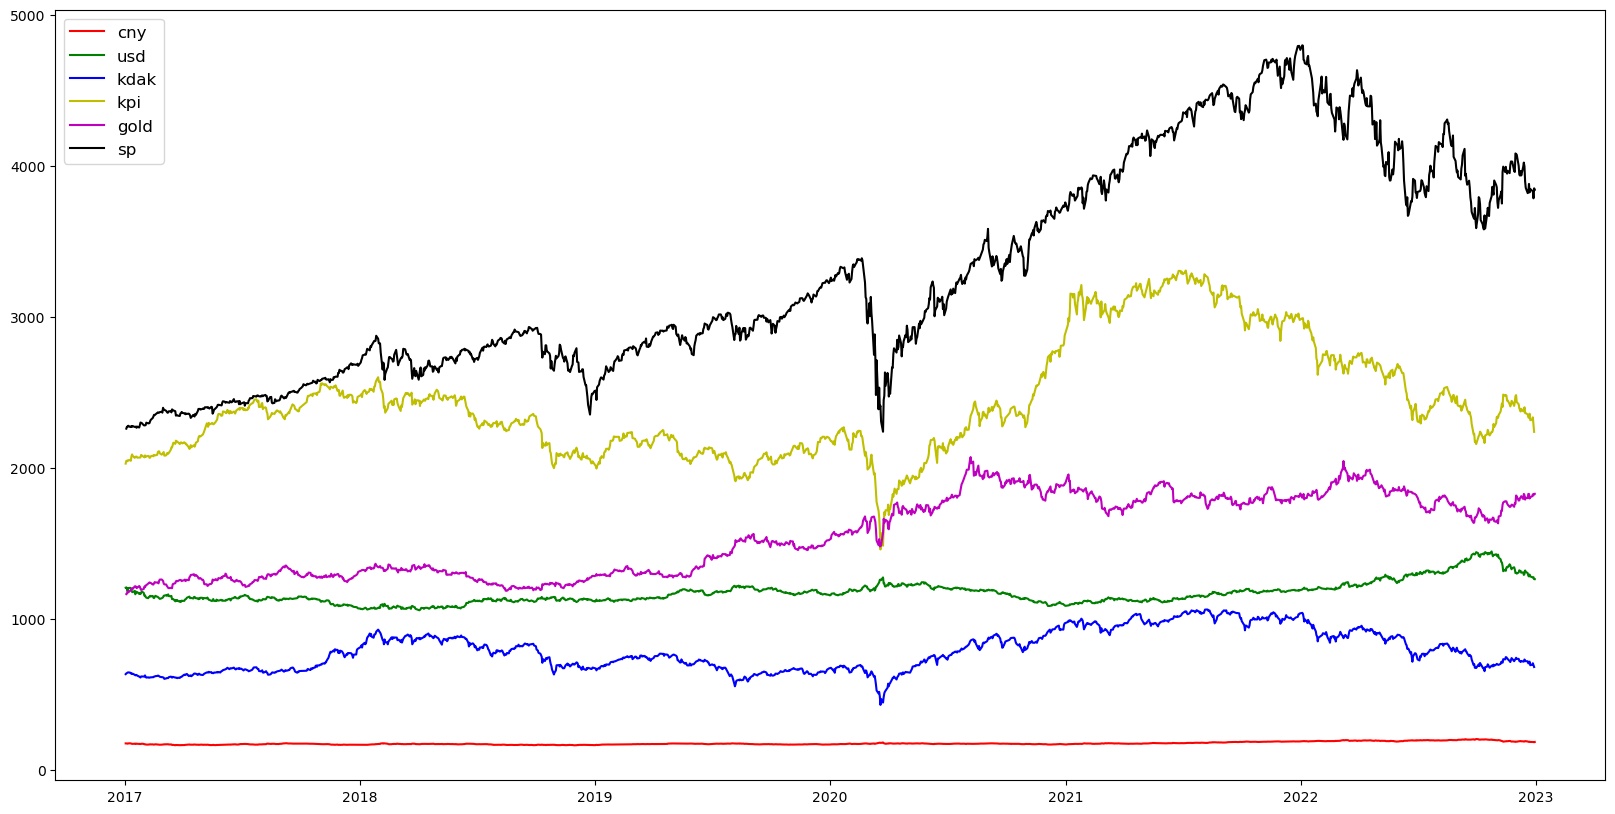

In [401]:
pi.close, color='y')
plt.plot(gold.index, gold.close, color='m')
plt.plot(sp.index, sp.close, color='k')

plt.legend(['cny', 'usd', 'kdak', 'kpi', 'gold', 'sp'], fontsize=12, loc='best'),

(<matplotlib.legend.Legend at 0x20a2cf1c6a0>,)

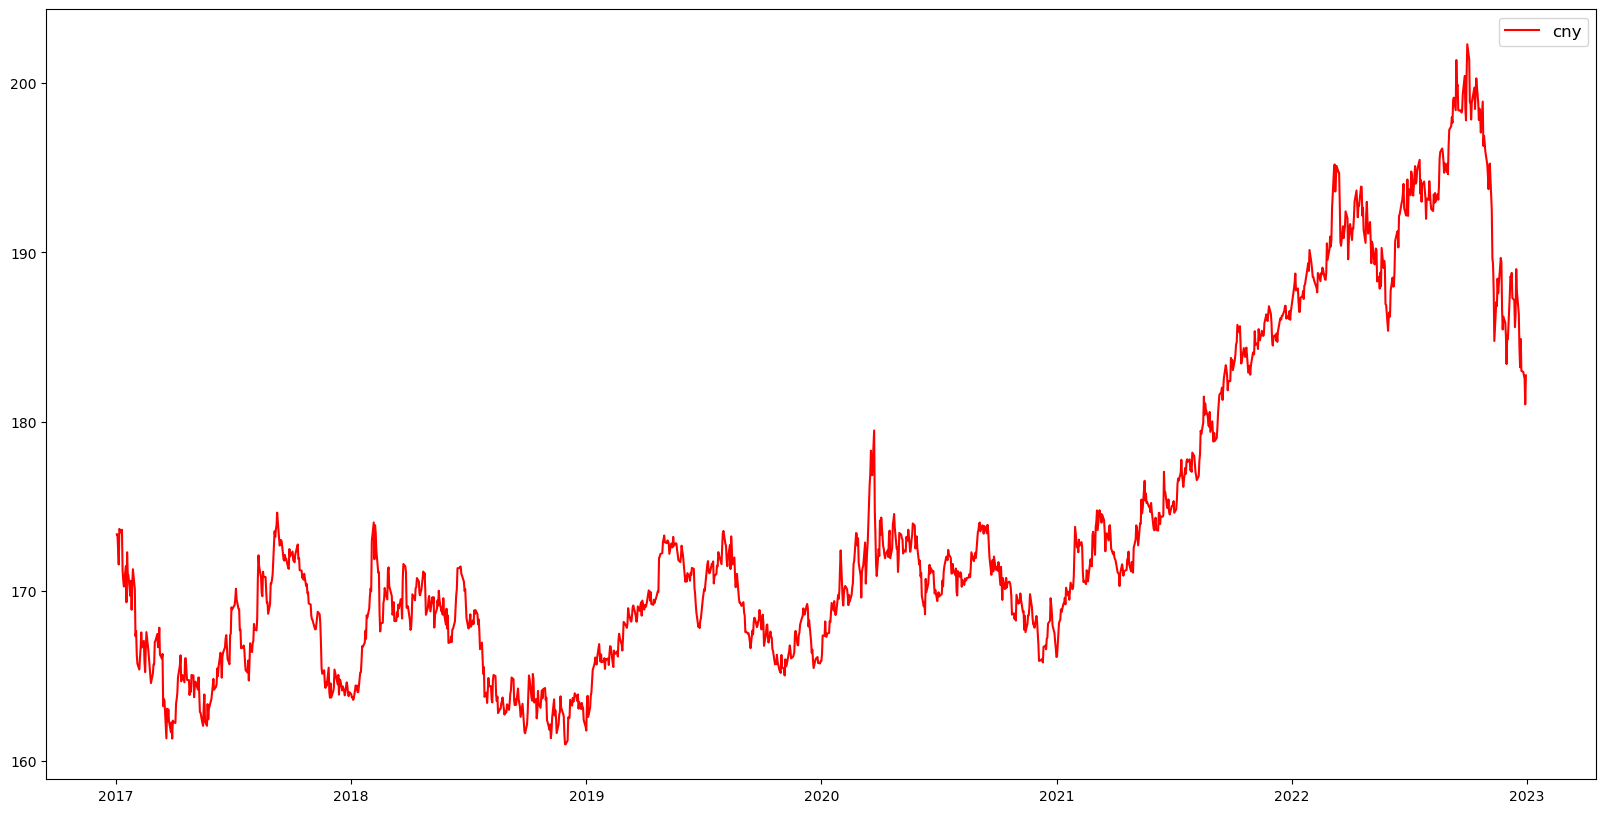

In [392]:
cny.index = pd.to_datetime(cny.index)
plt.figure(figsize=(20, 10))
plt.plot(cny.index, cny.close, color='r')
plt.legend(['cny'], fontsize=12, loc='best'),

In [402]:
import pandas as pd

df = pd.DataFrame([['kdak.close', 'kpi.close']])
df2 = pd.DataFrame([['kdak.open', 'kpi.open']])

corr = df.corrwith(df2[0])
print(corr)

Series([], dtype: float64)


In [403]:
corr = kpi.corrwith(kdak)
corr
#코스피와 코스닥의 상관관계 분석을 진행해본 결과 0.90으로 상당히 높은 수준의 관계를 보이므로
#한국 주식의 대표격인 코스피로 분석을 진행하겠습니다.
#코스닥은 사용하지 않을 예정입니다.

close           0.903511
open            0.903244
high            0.902428
low             0.905240
fluctuations    0.796396
dtype: float64

<Axes: >

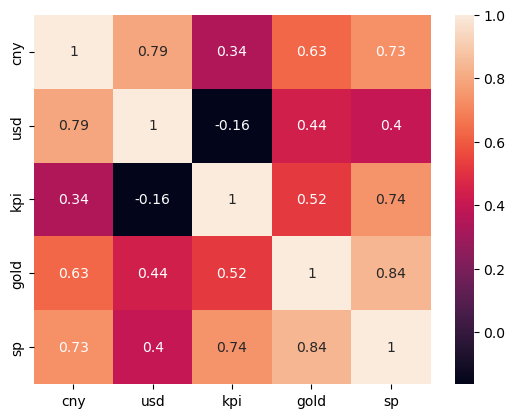

In [404]:
import pandas as pd
import seaborn as sns

cny1 = cny['close']
usd1 = usd['close']
kpi1 = kpi['close']
gold1 = gold['close']
sp1 = sp['close']

# Fill in missing values with the mean
kpi1.fillna(kpi1.mean(), inplace=True)

df = pd.DataFrame({'cny': cny1, 'usd': usd1, 'kpi': kpi1, 'gold': gold1, 'sp': sp1})
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True)